In [ ]:
import librosa, os, sys
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sn

In [ ]:
! unzip digits.zip

# Βήμα 2

In [ ]:
def data_parser (directory,Fs):
    
    dict = {'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9}  # Define dictionary for the conversion of all digit names to the corresponding digits
    wavs, digits, speakers = [],[],[]                                                          # Initialize lists for the wav files, the digits and the speakers


    for file in os.listdir(directory):                                    # For each wav file in the given directory repeat the following process
        wav,sr = librosa.core.load(directory+file, mono=True ,sr=Fs)      # Load wav file as a floating point time series and resample it to the frequency Fs
        wavs.append(wav)                                                  # Add wav file to wav list
        filename, format = file.split(".")[0], file.split(".")[1]         # Seperate filename from format type (.wav)    
        digit = ''.join([i for i in filename if not i.isdigit()])         # Keep only letters to form the digit name   
        speaker = filename[len(digit):]                                   # The rest of the filaname is the speaker
        digits.append(dict[digit])                                        # Convert digit name to the corresponding digit number using the dictionary and add the digit to digits list
        speakers.append(speaker)                                          # Add speaker to speaker list

    return wavs,digits,speakers                                           # Return lists wavs, digits and speakers

In [ ]:
directory = "digits/"             # Define the directory that contains the was files
Fs = 16000                        # Define sampling frequency Fs = 16kHZ

wavs,digits,speakers = data_parser(directory,Fs)  # call data parser to get lists wavs, digits and speakers

# Βήμα 3

In [ ]:
MFCCs, deltas, deltas_deltas = [], [], []  # Define lists with MFCCs, deltas and deltas_deltas for all wavs files

window = 25*Fs//1000                       # Set window size (in samples) equal to sampling rate * 25msec
step = 10*Fs//1000                         #  Set step parameter equal to sampling rate * 10msec

for wav in wavs:  # For each wav
    MFCC = librosa.feature.mfcc(wav,sr=Fs,n_mfcc=13,n_fft=window,hop_length=step).T  # Extract MFCCs of shape (num_of_frames, 13)
    MFCCs.append(MFCC)                                                               # Append MFCCs for each .wav file to MFCCs list                                                               
    deltas.append(librosa.feature.delta(MFCC))                                       # Find deltas (librosa.feature.delta) and append to list 
    deltas_deltas.append(librosa.feature.delta(MFCC,order=2))                        # Find deltas_deltas (librosa.feature.delta(,order=2)) and append to list

# Βήμα 4

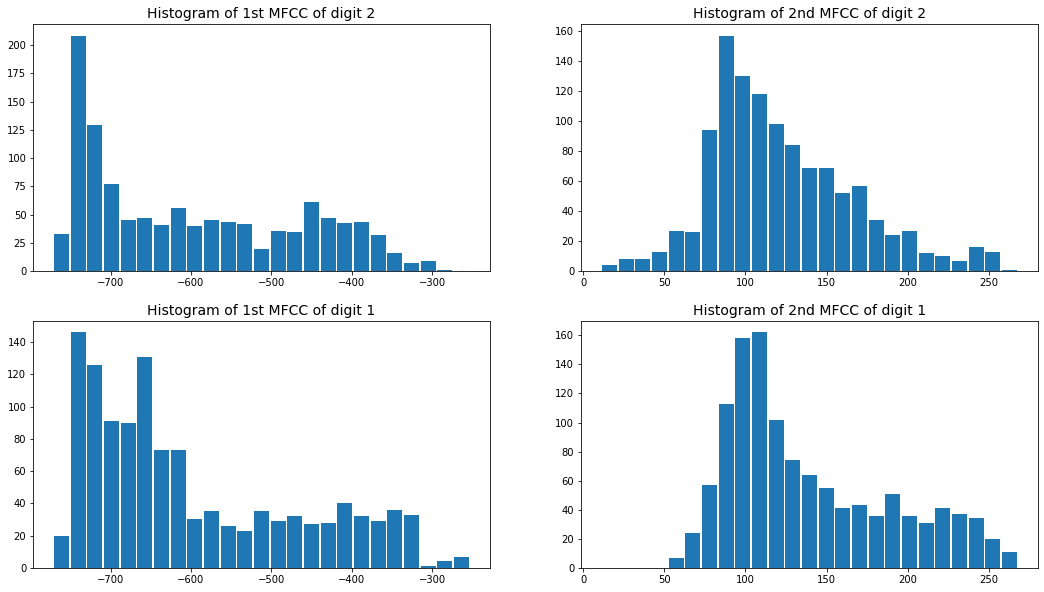

In [ ]:
n1 = 2                                                                                               # digit n1
n2 = 1                                                                                               # digit n2   

hist_n1_1,hist_n1_2,hist_n2_1,hist_n2_2 = np.array([]),np.array([]),np.array([]),np.array([])        # Initialize arrays for 1st and 2nd MFCC of digits n1 and n2  

for i in range(len(wavs)):                                                                           # For each one of the wav files  
    if digits[i] == n1:                                                                              # If wav file refers to digit n1
        hist_n1_1 = np.concatenate((hist_n1_1,MFCCs[i][:,0]))                                        # Take the vector of the 1st MFCC and add it to array hist_n1_1
        hist_n1_2 = np.concatenate((hist_n1_2,MFCCs[i][:,1]))                                        # Take the vector of the 2nd MFCC and add it to array hist_n1_2
    if digits[i] == n2:                                                                              # If wav file refers to digit n2
        hist_n2_1 = np.concatenate((hist_n2_1,MFCCs[i][:,0]))                                        # Take the vector of the 1st MFCC and add it to array hist_n2_1
        hist_n2_2 = np.concatenate((hist_n2_2,MFCCs[i][:,1]))                                        # Take the vector of the 2nd MFCC and add it to array hist_n2_2                                         
                                                                                                     
title = ['Histogram of 1st MFCC of digit '+str(n1), 'Histogram of 2nd MFCC of digit '+str(n1),       # Titles for the the subplot
         'Histogram of 1st MFCC of digit '+str(n2),'Histogram of 2nd MFCC of digit '+str(n2)]

hist_values = []                                                                                     # Initialize list for the histogram values 

min_1 = min(min(hist_n1_1),min(hist_n2_1))                                      # Minimum value of 1st MFCC for the digits n1 and n2 
max_1 = max(max(hist_n1_1),max(hist_n2_1))                                      # Maximum value of 1st MFCC for the digits n1 and n2 
min_2 = min(min(hist_n1_2),min(hist_n2_2))                                      # Minimum value of 2nd MFCC for the digits n1 and n2 
max_2 = max(max(hist_n1_2),max(hist_n2_2))                                      # Maximum value of 2nd MFCC for the digits n1 and n2 

j=0                                                                              
fig,axs = plt.subplots(2,2,figsize=(18,10))                                     # Define a (2,2) subplot
for i,h in enumerate([hist_n1_1,hist_n1_2,hist_n2_1,hist_n2_2]):                
    if i%2 == 0:                                                                                   
        n,_,_ = axs[j][0].hist(h,bins=25,range=(min_1,max_1),rwidth = 0.9)      # Plot histograms of 1st MFCC in the first column (column 0)
        axs[j][0].set_title(title[i],fontsize=14)                               # Title of histogram
    else:                                                                       
        n,_,_ = axs[j][1].hist(h,bins=25,range=(min_2,max_2),rwidth = 0.9)      # Plot histograms of 2nd MFCC in the second column (column 1)
        axs[j][1].set_title(title[i],fontsize=14)                               # Title of histogram
    hist_values.append(n)                                                       # Keep histogram values to a list
    if i==1: j=1                                                                

In [ ]:
# Use mutual info score from scikit-learn to define divergence between the 1st MFCC of the digits n1 and n2 and divergence between the 2nd MFCC of the digits n1 and n2

from sklearn.metrics import mutual_info_score

print("Divergence for \033[1m1st MFCC\033[0m between digits {} and {} is: \033[1m{}\033[0m".format(n1,n2,mutual_info_score(hist_values[0],hist_values[2])))
print("Divergence for \033[1m2nd MFCC\033[0m between digits {} and {} is: \033[1m{}\033[0m".format(n1,n2,mutual_info_score(hist_values[1],hist_values[3])))

Divergence for 1st MFCC between digits 2 and 1 is: 2.830713403754631
Divergence for 2nd MFCC between digits 2 and 1 is: 2.71980985486504


In [ ]:
MFSCs_n1, MFSCs_n2 = [], []                                                      # Initialize lists for the MFSCs for digits n1 and n2
MFCCs_n1, MFCCs_n2 = [], []                                                      # Initialize lists for the MFCCs for digits n1 and n2

n1_indexes = np.random.choice(np.argwhere(np.array(digits)==n1).flatten(),2)     # Choose at random 2 wavs that refer to the digit n1
n2_indexes = np.random.choice(np.argwhere(np.array(digits)==n2).flatten(),2)     # Choose at random 2 wavs that refer to the digit n2

for index in n1_indexes:                                                                                        # For each one of the two wavs that refer to the digit n1
    MFSC_n1 = librosa.feature.melspectrogram(wavs[index], sr=Fs, n_mels=13, n_fft=window, hop_length=step).T    # Calculate MFSC by using librosa.feature.melspectrogram
    MFSCs_n1.append(MFSC_n1)                                                                                    # Add MFSC to MFSCs_n1 list
    MFCCs_n1.append(MFCCs[index])                                                                               # Add MFCC to MFCCs_n1 list

for index in n2_indexes:                                                                                        # For each one of the two wavs that refer to the digit n2
    MFSC_n2 = librosa.feature.melspectrogram(wavs[index], sr=Fs, n_mels=13, n_fft=window, hop_length=step).T    # Calculate MFSC by using librosa.feature.melspectrogram
    MFSCs_n2.append(MFSC_n2)                                                                                    # Add MFSC to MFSCs_n2 list
    MFCCs_n2.append(MFCCs[index])                                                                               # Add MFCC to MFCCs_n2 list

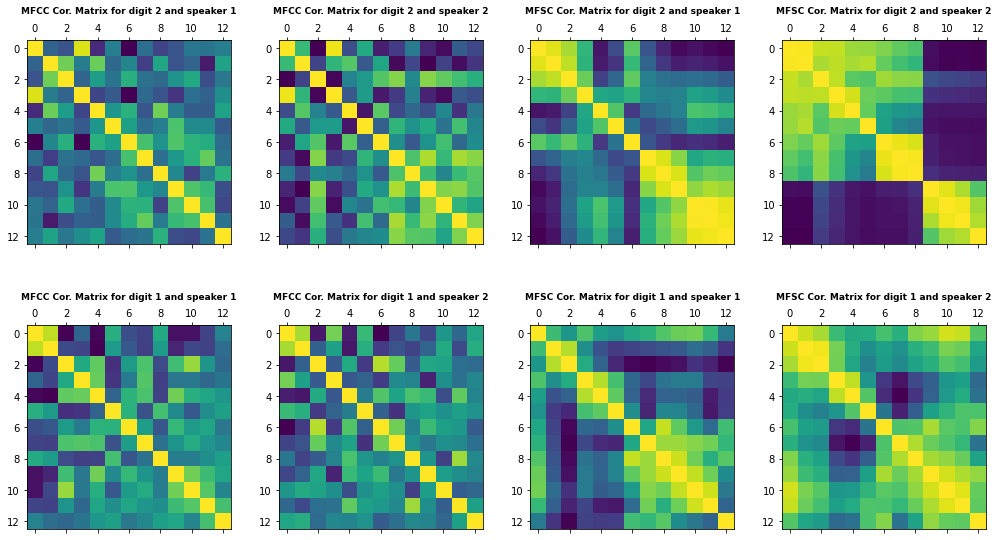

In [ ]:
import pandas as pd

fig,axs = plt.subplots(2,4,figsize=(18,9))
j = 0
for i, (mfcc_n1,mfcc_n2,mfsc_n1,mfsc_n2) in enumerate(zip(MFCCs_n1, MFCCs_n2, MFSCs_n1,MFSCs_n2)):
    axs[0,i].matshow(pd.DataFrame(mfcc_n1).corr())                                                                      # MFCC Correlation Matrix for digit n1
    axs[0,i].set_title("MFCC Cor. Matrix for digit {} and speaker {}\n".format(n1,i+1),fontsize=9,fontweight="bold")    # Title
    axs[1,i].matshow(pd.DataFrame(mfcc_n2).corr())                                                                      # MFCC Correlation Matrix for digit n2
    axs[1,i].set_title("MFCC Cor. Matrix for digit {} and speaker {}\n".format(n2,i+1),fontsize=9,fontweight="bold")    # Title
    axs[0,i+2].matshow(pd.DataFrame(mfsc_n1).corr())                                                                    # MFSC Correlation Matrix for digit n1
    axs[0,i+2].set_title("MFSC Cor. Matrix for digit {} and speaker {}\n".format(n1,i+1),fontsize=9,fontweight="bold")  # Title
    axs[1,i+2].matshow(pd.DataFrame(mfsc_n2).corr())                                                                    # MFSC Correlation Matrix for digit n2
    axs[1,i+2].set_title("MFSC Cor. Matrix for digit {} and speaker {}\n".format(n2,i+1),fontsize=9,fontweight="bold")  # Title
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.01)

# Βήμα 5

In [ ]:
features = []                             # Initialize list with concatenated (MFCCs + deltas + deltas_deltas) features values for each .wav file
means = []                                # Initialize list with means values for each .wav file 
stds = []                                 # Initialize list with stds values for each .wav file
means_stds = np.zeros((len(wavs),78))     # Initialize array with concatenated means + stds values for each .wav file

for i, (mfcc,delta,delta_delta) in enumerate(zip(MFCCs,deltas,deltas_deltas)): # For each .wav file
    wav_features = np.concatenate((mfcc,delta,delta_delta),axis=1)             # Concatenate mfccs, deltas and deltas_deltas values (array with shape (num_of_frames,39)) 
    features.append(wav_features)                                              # Append to list "features"
    wav_means = np.mean(wav_features,axis=0)                                   # Get mean vector (39,) 
    means.append(wav_means)                                                    # Append to list "means"
    wav_stds = np.std(wav_features,axis=0)                                     # Get stds vector (39,)
    stds.append(wav_stds)                                                      # Append to list "stds"
    means_stds[i,:] = np.concatenate([wav_means,wav_stds])                     # Concatenate mean + stds vectors (78,)

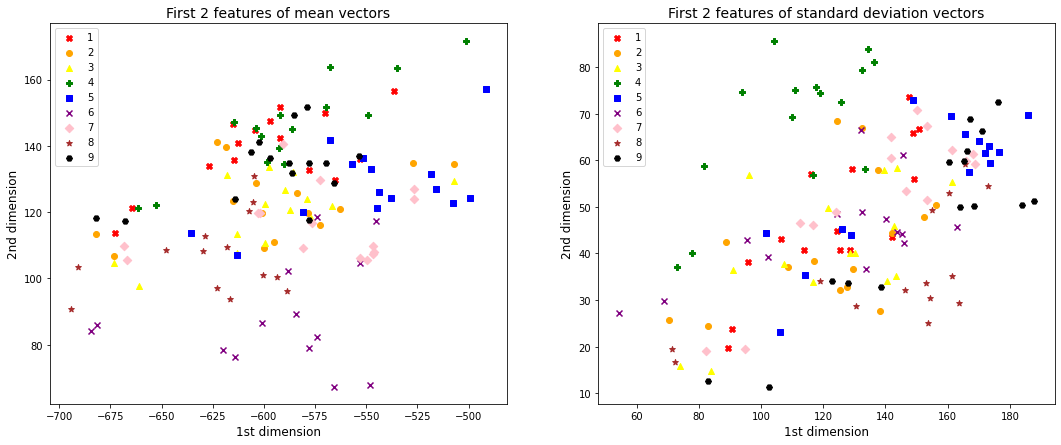

In [ ]:
colors = {1:'red',2:'orange',3:'yellow',4:'green',5:'blue',6:'purple',7:'pink',8:'brown',9:'black'}   # Define different color for each digit
markers = {1: 'X',2: 'o' , 3: '^', 4: 'P', 5: 's', 6: 'x', 7: 'D', 8:'*', 9: 'H'}                     # Define different marker for each digit

fig,axs = plt.subplots(1,2,figsize=(18,7))

for digit in np.unique(digits): # For each digit
    axs[0].scatter(means_stds[digits == digit, 0], means_stds[digits == digit, 1],color=colors[digit],marker=markers[digit],label=digit)    # Plot first two dimensions of means vector 
    axs[1].scatter(means_stds[digits == digit, 39], means_stds[digits == digit, 40],color=colors[digit],marker=markers[digit],label=digit)  # Plot first two dimensions of stds vector

axs[0].set_title("First 2 features of mean vectors",fontsize=14)                # Set title for 1st subplot
axs[0].set_xlabel("1st dimension",fontsize=12)                                  # Set x_label for 1st subplot
axs[0].set_ylabel("2nd dimension",fontsize=12)                                  # Set y_label for 1st subplot
axs[0].legend(loc='upper left')                                                 # Set legend for 1st subplot
axs[1].set_title("First 2 features of standard deviation vectors",fontsize=14)  # Set title for 2nd subplot
axs[1].set_xlabel("1st dimension",fontsize=12)                                  # Set x_label for 2nd subplot
axs[1].set_ylabel("2nd dimension",fontsize=12)                                  # Set y_label for 2nd subplot
axs[1].legend(loc='upper left')                                                 # Set legend for 2nd subplot
plt.show()

# Βήμα 6

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)                       # Set number of components to keep equal to 2
means_reduced = pca.fit_transform(means)        # Apply PCA to means vectors
stds_reduced = pca.fit_transform(stds)          # Apply PCA to stds vectors

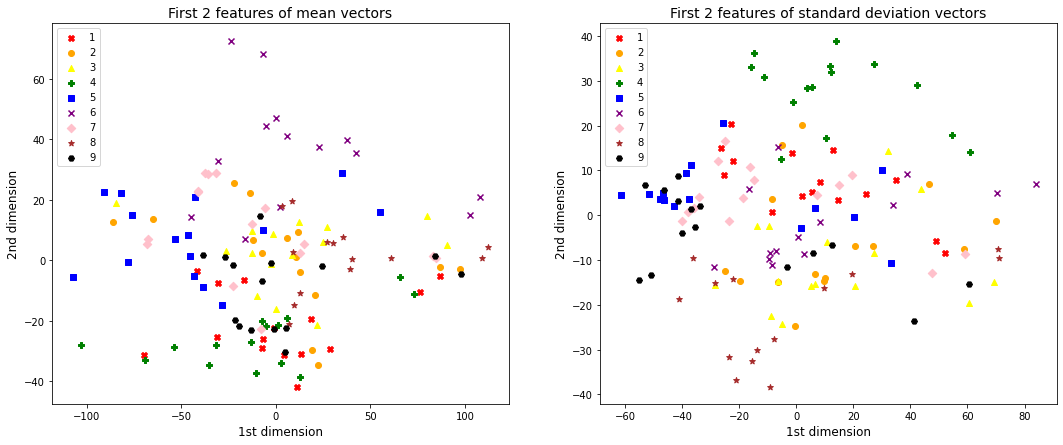

In [ ]:
colors = {1:'red',2:'orange',3:'yellow',4:'green',5:'blue',6:'purple',7:'pink',8:'brown',9:'black'}     # Define different color for each digit
markers = {1: 'X',2: 'o' , 3: '^', 4: 'P', 5: 's', 6: 'x', 7: 'D', 8:'*', 9: 'H'}                       # Define different marker for each digit

fig,axs = plt.subplots(1,2,figsize=(18,7))

for digit in np.unique(digits): # For each digit
    axs[0].scatter(means_reduced[digits == digit, 0], means_reduced[digits == digit, 1],color=colors[digit],marker=markers[digit],label=digit) # Plot first two dimensions of transformed means vector
    axs[1].scatter(stds_reduced[digits == digit, 0], stds_reduced[digits == digit, 1],color=colors[digit],marker=markers[digit],label=digit)   # Plot first two dimensions of transformed stds vector

axs[0].set_title("First 2 features of mean vectors",fontsize=14)                # Set title for 1st subplot
axs[0].set_xlabel("1st dimension",fontsize=12)                                  # Set x_label for 1st subplot
axs[0].set_ylabel("2nd dimension",fontsize=12)                                  # Set y_label for 1st subplot
axs[0].legend(loc='upper left')                                                 # Set legend for 1st subplot
axs[1].set_title("First 2 features of standard deviation vectors",fontsize=14)  # Set title for 2nd subplot
axs[1].set_xlabel("1st dimension",fontsize=12)                                  # Set x_label for 2nd subplot
axs[1].set_ylabel("2nd dimension",fontsize=12)                                  # Set y_label for 2nd subplot
axs[1].legend(loc='upper left')                                                 # Set legend for 2nd subplot

plt.show()

In [ ]:
pca = PCA(n_components=3)                     # Set number of components to keep equal to 3
means_reduced = pca.fit_transform(means)      # Apply PCA to means vectors
stds_reduced = pca.fit_transform(stds)        # Apply PCA to stds vectors

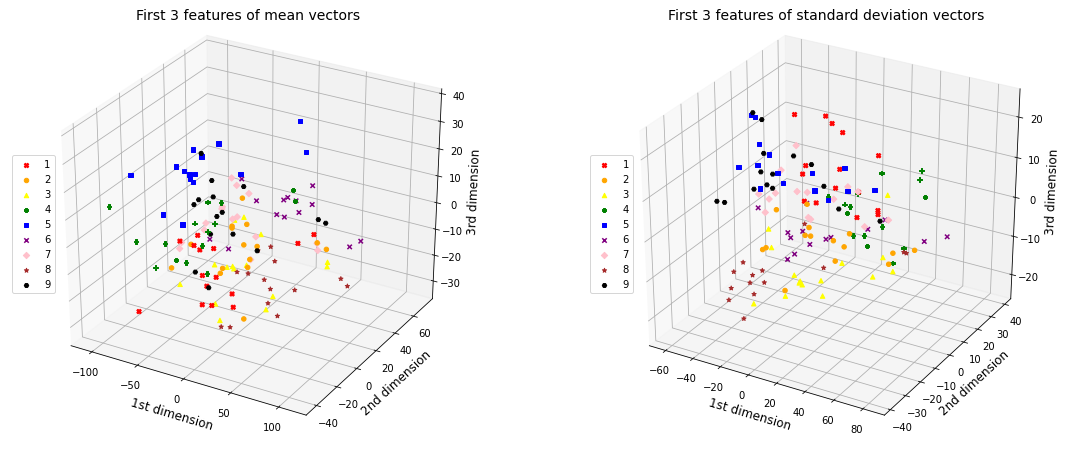

In [ ]:
colors = {1:'red',2:'orange',3:'yellow',4:'green',5:'blue',6:'purple',7:'pink',8:'brown',9:'black'}       # Define different color for each digit
markers = {1: 'X',2: 'o' , 3: '^', 4: 'P', 5: 's', 6: 'x', 7: 'D', 8:'*', 9: 'H'}                         # Define different marker for each digit

fig = plt.figure(figsize=(19,8))
ax = fig.add_subplot(1,2,1,projection='3d')

for digit in np.unique(digits): # For each digit
    ax.scatter(means_reduced[digits == digit, 0], means_reduced[digits == digit, 1],means_reduced[digits == digit, 2], alpha = 1, color=colors[digit],marker=markers[digit],label=digit) # Plot first two dimensions of transformed means vector
    
ax.set_title("First 3 features of mean vectors\n",fontsize=14)                  # Set title for 1st subplot
ax.set_xlabel("1st dimension",fontsize=12)                                      # Set x_label for 1st subplot
ax.set_ylabel("2nd dimension",fontsize=12)                                      # Set y_label for 1st subplot
ax.set_zlabel("3rd dimension",fontsize=12)                                      # Set z_label for 1st subplot
ax.legend(loc='center left')                                                    # Set legend for 1st subplot

ax = fig.add_subplot(1,2,2,projection='3d')

for digit in np.unique(digits): # For each digit
    ax.scatter(stds_reduced[digits == digit, 0], stds_reduced[digits == digit, 1],stds_reduced[digits == digit, 2], alpha = 1, color=colors[digit],marker=markers[digit],label=digit) # Plot first two dimensions of transformed stds vector

ax.set_title("First 3 features of standard deviation vectors\n",fontsize=14)    # Set title for 2nd subplot
ax.set_xlabel("1st dimension",fontsize=12)                                      # Set x_label for 2nd subplot
ax.set_ylabel("2nd dimension",fontsize=12)                                      # Set y_label for 2nd subplot
ax.set_zlabel("3rd dimension",fontsize=12)                                      # Set z_label for 2nd subplot
ax.legend(loc='center left')                                                    # Set legend for 2nd subplot
plt.show()

In [ ]:
def plot_individual_explained_variance(means_explained_variance_pca, stds_explained_variance_pca): # Helper function to print bar plots of explained variance ratio for each of the selected components
    plt.rcdefaults()
    fig,axs = plt.subplots(1,2,figsize=(15,5))

    components = len(means_explained_variance_pca)                                                 # Get number of components
    ind = np.arange(components)

    if components == 3:                                                                            # Set width of bars according to the number of components
       width = 0.8
    else:
       width = 0.4
                                                                                                                                                                                                       
    colors = ['dodgerblue','orangered', 'khaki']                                                   # Set different colors for up to three bars
    means_barlist = axs[0].bar(ind, means_explained_variance_pca, width, color=colors)             # Plot bar plot for transformed means vectors
    stds_barlist = axs[1].bar(ind, stds_explained_variance_pca, width, color=colors)               # Plot bar plot for transformed stds vectors

    def autolabel(rects, axs_index):                                                               # Helper function to print explained variance ratio above each bar
        for rect in rects:
            height = rect.get_height()                                                             # Get height of bar, etc. explained variance ratio for each component
            axs[axs_index].text(rect.get_x() + rect.get_width()/2., 1*height, np.round(height,3), ha='center', va='bottom')

    autolabel(means_barlist, 0)
    autolabel(stds_barlist, 1)

    # axes and labels                                                                                                                                                                                                  
    xtick_marks = [str(i+1) for i in range(components)]
    xtick_names = axs[0].set_xticklabels(xtick_marks)
    axs[0].set_xticks(ind)                                                      # Set x_ticks for 1st subplot
    axs[0].set_ylabel('Explained variance ratio',fontsize=12)                   # Set y_labels for 1st subplot
    axs[0].set_xlabel('Principal component',fontsize=12)                        # Set x_labels for 1st subplot
    axs[0].set_title('Mean: Individual explained variance',fontsize=12)         # Set title for 1st subplot

    xtick_names = axs[1].set_xticklabels(xtick_marks)
    axs[1].set_xticks(ind)                                                      # Set x_ticks for 2nd subplot
    axs[1].set_ylabel('Explained variance ratio',fontsize=12)                   # Set y_labels for 2nd subplot
    axs[1].set_xlabel('Principal component',fontsize=12)                        # Set x_labels for 2nd subplot
    axs[1].set_title('Std: Individual explained variance',fontsize=12)          # Set title for 2nd subplot

    plt.show()

In [ ]:
def pca_(components,means,stds):
 
    pca = PCA(n_components=components).fit(means)                               # Apply PCA to means vectors ((39,) each) 
    means_exp_var_pca = pca.explained_variance_ratio_                           # Find percentage of variance explained by each of the selected components
    mean_cum_sum_eigenvalues = np.cumsum(means_exp_var_pca)                     # Find cumulative explained variance ratio
    
    pca = PCA(n_components=components).fit(stds)                                # Apply PCA to stds vectors ((39,) each) 
    stds_exp_var_pca = pca.explained_variance_ratio_                            # Find percentage of variance explained by each of the selected components
    std_cum_sum_eigenvalues = np.cumsum(stds_exp_var_pca)                       # Find cumulative explained variance ratio

    plot_individual_explained_variance(means_exp_var_pca, stds_exp_var_pca)     # Plot percentage of variance explained by each of the selected components
  
    print("\n\033[1mMean\033[0m: Percentage of initial variance explained by {} components is: \033[1m{} %\033[0m".format(components,mean_cum_sum_eigenvalues[components-1]*100)) # Print percentage of variance explained by selected components for means vectors
    print("\033[1mStd\033[0m: Percentage of initial variance explained by {} components is: \033[1m{} %\033[0m".format(components,std_cum_sum_eigenvalues[components-1]*100))     # Print percentage of variance explained by selected components for stds vectors

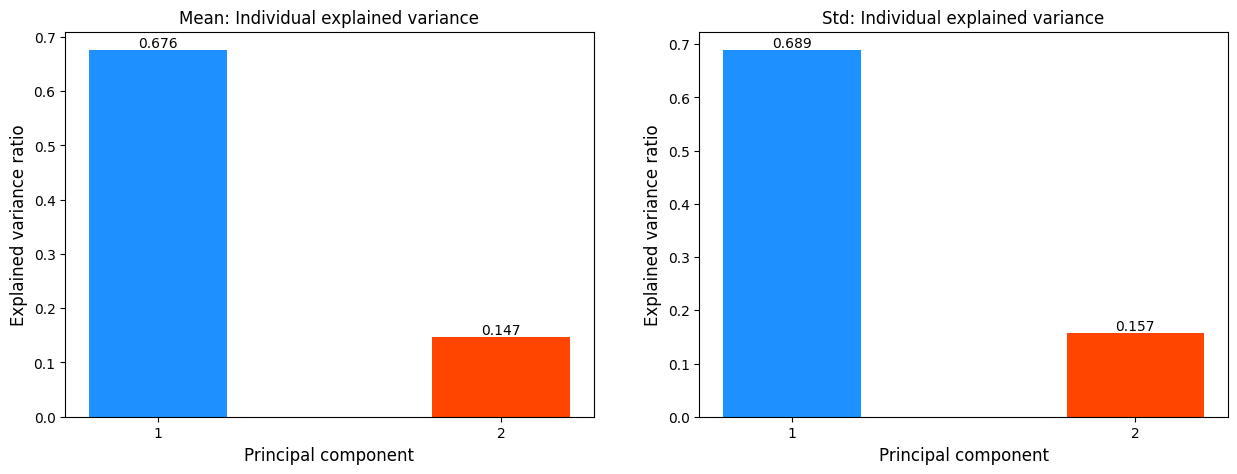


Mean: Percentage of initial variance explained by 2 components is: 82.23954458730701 %
Std: Percentage of initial variance explained by 2 components is: 84.61344811597893 %


In [ ]:
pca_(2,means,stds)

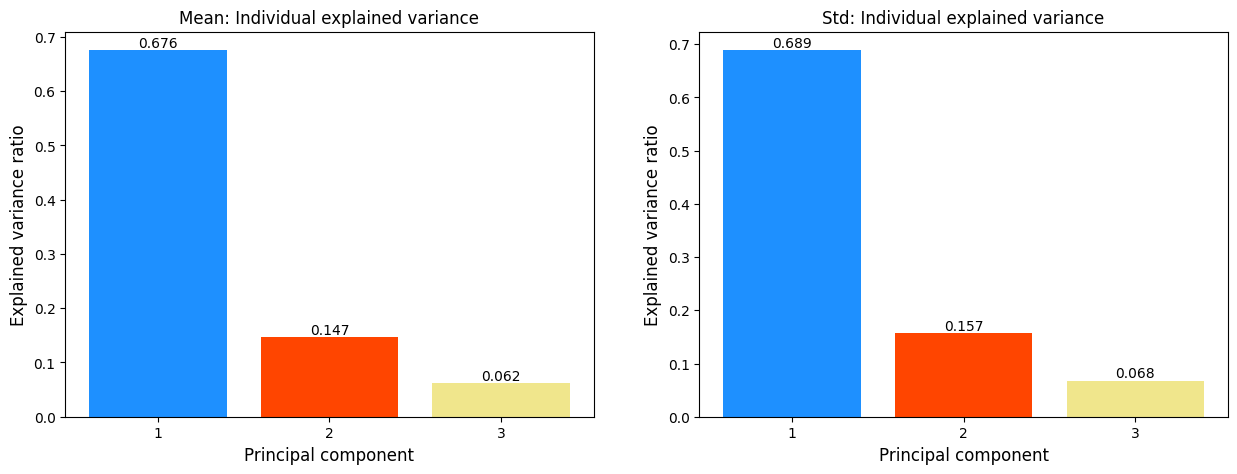


Mean: Percentage of initial variance explained by 3 components is: 88.41185151537583 %
Std: Percentage of initial variance explained by 3 components is: 91.3789244267216 %


In [ ]:
pca_(3,means,stds)

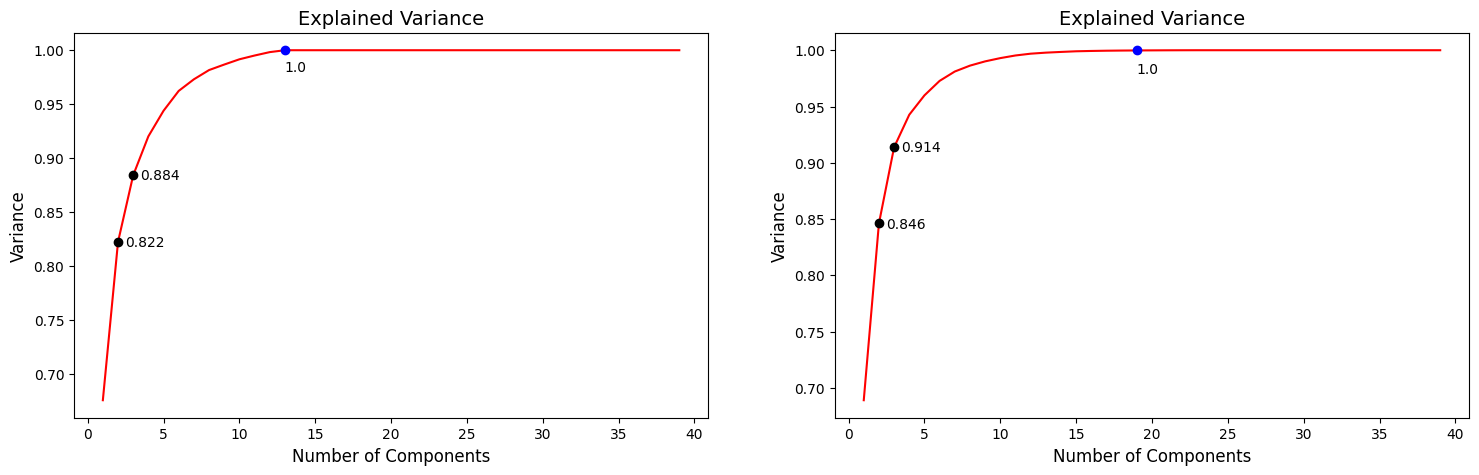

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(18,5))

pca = PCA().fit(means)                                                          # Apply PCA to means vectors ((39,) each)
variance = np.cumsum(pca.explained_variance_ratio_)                             # Find cumulative explained variance ratio
axs[0].plot([i+1 for i in range(39)],variance,'red')                            # Plot cumulative explained variance ratio with respect to number of components 
axs[0].scatter(2,variance[1],color='black',zorder=3)                            # Note 2 components and corresponding cumulative explained variance ratio
axs[0].scatter(3,variance[2],color='black',zorder=3)                            # Note 3 components and corresponding cumulative explained variance ratio
axs[0].scatter(13,variance[12],color='blue',zorder=3)                           # Note 13 components and corresponding cumulative explained variance ratio 
axs[0].text(2.45, variance[1]-0.004, np.round(variance[1],3),fontsize=10)       # Note cumulative explained variance ratio for 2 components (= 0.822)
axs[0].text(3.45, variance[2]-0.004, np.round(variance[2],3),fontsize=10)       # Note cumulative explained variance ratio for 3 components (= 0.884)
axs[0].text(13, variance[12]-0.02, np.round(variance[12],3),fontsize=10)        # Note cumulative explained variance ratio for 13 components (= 1)
axs[0].set_title("Explained Variance",fontsize=14)                              # Set title for 1st subplot
axs[0].set_xlabel('Number of Components',fontsize=12)                           # Set x_label for 1st subplot
axs[0].set_ylabel('Variance',fontsize=12)                                       # Set y_label for 1st subplot


pca = PCA().fit(stds)                                                           # Apply PCA to stds vectors ((39,) each)
variance = np.cumsum(pca.explained_variance_ratio_)                             # Find cumulative explained variance ratio
axs[1].plot([i+1 for i in range(39)],variance,'red')                            # Plot cumulative explained variance ratio with respect to number of components
axs[1].scatter(2,variance[1],color='black',zorder=3)                            # Note 2 components and corresponding cumulative explained variance ratio
axs[1].scatter(3,variance[2],color='black',zorder=3)                            # Note 3 components and corresponding cumulative explained variance ratio
axs[1].scatter(19,variance[18],color='blue',zorder=3)                           # Note 19 components and corresponding cumulative explained variance ratio
axs[1].text(2.45, variance[1]-0.004, np.round(variance[1],3),fontsize=10)       # Note cumulative explained variance ratio for 2 components (= 0.846)
axs[1].text(3.45, variance[2]-0.004, np.round(variance[2],3),fontsize=10)       # Note cumulative explained variance ratio for 3 components (= 0.914)
axs[1].text(19, variance[18]-0.02, np.round(variance[18],3),fontsize=10)        # Note cumulative explained variance ratio for 19 components (= 1.0)
axs[1].set_title("Explained Variance",fontsize=14)                              # Set title for 2nd subplot
axs[1].set_xlabel('Number of Components',fontsize=12)                           # Set x_label for 2nd subplot
axs[1].set_ylabel('Variance',fontsize=12)                                       # Set y_label for 2nd subplot

plt.show()

# Βήμα 7

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(means_stds,np.array(digits),test_size=0.3,random_state=42) # Split data to train-test set

scaler  = StandardScaler()                    # Normalize data with Standard Scaler
X_train = scaler.fit_transform(X_train)       # Apply Standard Scaler to train data
X_test  = scaler.transform(X_test)            # Apply Standard Scaler to test data

In [ ]:
print("\033[1m X_train shape is: {}".format(X_train.shape)) 
print("\033[1m X_test shape is: {}".format(X_test.shape))
print("\033[1m y_train shape is: {}".format(y_train.shape))
print("\033[1m y_test shape is: {}".format(y_test.shape))

 X_train shape is: (93, 78)
 X_test shape is: (40, 78)
 y_train shape is: (93,)
 y_test shape is: (40,)


Χρησιμοποιούμε έτοιμο τον κώδικα από την πρώτη εργαστηριακή άσκηση για τον Custom Naive Bayes Classifier.

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomNBClassifier(BaseEstimator, ClassifierMixin):
    """Custom implementation of Naive Bayes classifier"""

    def __init__(self, use_unit_variance=False):
        self.X_mean_ = None
        self.X_var_ = None
        self.apriori = None
        self.y_train_datatype = None
        self.num_of_classes = 9
        self.use_unit_variance = use_unit_variance


    def fit(self, X, y):
        self.X_mean_ = np.zeros((self.num_of_classes,X.shape[1]))
        self.X_var_ = np.zeros((self.num_of_classes,X.shape[1])) 
        self.apriori = np.zeros(self.num_of_classes)
        self.y_train_datatype = y.dtype
        for class_dig in range(self.num_of_classes):
            train_rows = np.argwhere(y==class_dig + 1)[:,0]
            pixels_values = [X[train_row,:] for train_row in train_rows]
            self.apriori[class_dig] = (np.count_nonzero(y==class_dig + 1))/len(y)
            self.X_mean_[class_dig,:] = np.mean(pixels_values,0)
            if not self.use_unit_variance:
                  self.X_var_[class_dig,:] = np.var(pixels_values,0)
            else: continue
        if self.use_unit_variance: self.X_var_ = np.ones((self.num_of_classes,X.shape[1]))
        else: self.X_var_[self.X_var_==0] = 1e-5
        return self

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        criterion = np.zeros((self.num_of_classes,X.shape[0]))
        for class_dig in range(self.num_of_classes):
            ln_det_Sigma = sum(np.log(self.X_var_[class_dig,:]))
            inv_Sigma = np.linalg.inv(np.diag(self.X_var_[class_dig,:]))            
            for i in range(X.shape[0]):
                difference  = X[i,:] - self.X_mean_[class_dig,:]
                criterion[class_dig,i] = np.log(self.apriori[class_dig]) -  (X.shape[1]/2) * np.log(2*np.pi) - (1/2)*ln_det_Sigma - (1/2)*(np.transpose(difference) @ inv_Sigma @ difference)
        predictions = np.argmax(criterion,axis=0).astype(self.y_train_datatype)
        return predictions

    def score(self, X, y):
        predictions = self.predict(X).astype(self.y_train_datatype)
        score = (np.argwhere(y==predictions + 1).shape[0])/(y.shape[0])
        return score

In [ ]:
customNB = CustomNBClassifier()     # Define Custom Naive Bayes Classifier
customNB.fit(X_train, y_train)      # Fit Classifier
print("\033[1m Custom Gaussian Naive Bayes Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(customNB.score(X_test,y_test)*100,2))) # Print classifier's score

 Custom Gaussian Naive Bayes Classifier score is: 75.0 % 


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()                # Define Sklearn's Naive Bayes Classifier
gnb.fit(X_train, y_train)         # Fit Classifier
print("\033[1m Sklearn Gaussian Naive Bayes Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(gnb.score(X_test,y_test)*100,2))) # Print classifier's score

 Sklearn Gaussian Naive Bayes Classifier score is: 75.0 % 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier(n_neighbors=1) # Define Knn Classifier with number of neighbors equal to 1
knn_3 = KNeighborsClassifier(n_neighbors=3) # Define Knn Classifier with number of neighbors equal to 3
knn_5 = KNeighborsClassifier(n_neighbors=5) # Define Knn Classifier with number of neighbors equal to 5

knn_1.fit(X_train,y_train) # Fit Classifier
knn_3.fit(X_train,y_train) # Fit Classifier
knn_5.fit(X_train,y_train) # Fit Classifier

print("\033[1m KNeighbors Classifier with 1 neighbors \033[0mscore is:\033[1m {} % \033[0m".format(np.round(knn_1.score(X_test,y_test)*100,2))) # Print Classifier's score
print("\033[1m KNeighbors Classifier with 3 neighbors \033[0mscore is:\033[1m {} % \033[0m".format(np.round(knn_3.score(X_test,y_test)*100,2))) # Print Classifier's score
print("\033[1m KNeighbors Classifier with 5 neighbors \033[0mscore is:\033[1m {} % \033[0m".format(np.round(knn_5.score(X_test,y_test)*100,2))) # Print Classifier's score

 KNeighbors Classifier with 1 neighbors score is: 80.0 % 
 KNeighbors Classifier with 3 neighbors score is: 67.5 % 
 KNeighbors Classifier with 5 neighbors score is: 60.0 % 


In [ ]:
from sklearn.svm import SVC

linearSVM = SVC(kernel='linear',gamma='scale',probability=True) # Define SVM Classifier with linear kernel
linearSVM.fit(X_train,y_train)                                  # Fit Classifier
print("\033[1m Linear SVM Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(linearSVM.score(X_test,y_test)*100,2))) # Print Classifier's score

polySVM = SVC(kernel='poly',gamma='scale',probability=True) # Define SVM Classifier with polynomial kernel 
polySVM.fit(X_train,y_train)                                # Fit Classifier
print("\033[1m Polynomial SVM Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(polySVM.score(X_test,y_test)*100,2))) # Print Classifier's score

rbfSVM = SVC(kernel='rbf',gamma='scale',probability=True) # Define SVM Classifier with rbf kernel
rbfSVM.fit(X_train,y_train)                               # Fit Classifier
print("\033[1m Rbf SVM Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(rbfSVM.score(X_test,y_test)*100,2))) # Print Classifier's score

 Linear SVM Classifier score is: 92.5 % 
 Polynomial SVM Classifier score is: 52.5 % 
 Rbf SVM Classifier score is: 80.0 % 


## Bonus 

In [ ]:
zcrs, deltas_zcrs, deltas_deltas_zcrs = [], [], []   # Define lists with zero-crossing rates, deltas and deltas_deltas for all .wav files                         

for wav in wavs:  # For each wav
    zcr = librosa.feature.zero_crossing_rate(wav, frame_length = window, hop_length = step)[0,:13]  # Extract zcrs of shape (1,num_of_frames) and get the first 13 values --> (vector (13,))
    zcrs.append(zcr)                                                                                # Append zcrs for each .wav file to "zcrs" list                                                        # Find deltas (librosa.feature.delta) and append to list "deltas_zcrs"
    deltas_zcrs.append(librosa.feature.delta(zcr))                                                  # Find deltas (librosa.feature.delta) and append to list "deltas_zcrs"
    deltas_deltas_zcrs.append(librosa.feature.delta(zcr,order=2))                                   # Find deltas_deltas (librosa.feature.delta(,order=2)) and append to list "deltas_deltas_zcrs"

In [ ]:
zcr_features = np.zeros((len(wavs),39))               # Initialize array with concatenated zcrs + deltas_zcrs + deltas_deltas_zcrs for each .wav file         

for i, (zcr,deltas_zcr,deltas_deltas_zcr) in enumerate(zip(zcrs,deltas_zcrs,deltas_deltas_zcrs)):  # For each .wav file
   wav_zcr_features = np.concatenate((zcr,deltas_zcr,deltas_deltas_zcr))                           # Concatenate zcrs, deltas_zcrs and deltas_deltas_zcrs --> (vector (39,)) 
   zcr_features[i,:] = wav_zcr_features                                                            # Fill i-th row of "zcr_features" array

In [ ]:
augmented_features = np.concatenate((means_stds,zcr_features),axis=1)           # Concatenate previous "means_stds" array (shape (num_of_wavs,78)) and "zcr_features" array (shape (num_of_wavs,39))

X_train, X_test, y_train, y_test = train_test_split(augmented_features,np.array(digits),test_size=0.3,random_state=42)  # Split data to train-test set

scaler  = StandardScaler()                    # Normalize data with Standard Scaler
X_train = scaler.fit_transform(X_train)       # Apply Standard Scaler to train data
X_test  = scaler.transform(X_test)            # Apply Standard Scaler to test data

In [ ]:
print("\033[1m X_train shape is: {}".format(X_train.shape))
print("\033[1m X_test shape is: {}".format(X_test.shape))
print("\033[1m y_train shape is: {}".format(y_train.shape))
print("\033[1m y_test shape is: {}".format(y_test.shape))

 X_train shape is: (93, 117)
 X_test shape is: (40, 117)
 y_train shape is: (93,)
 y_test shape is: (40,)


In [ ]:
customNB = CustomNBClassifier()     # Define Custom Naive Bayes Classifier
customNB.fit(X_train, y_train)      # Fit Classifier
print("\033[1m Custom Gaussian Naive Bayes Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(customNB.score(X_test,y_test)*100,2))) # Print classifier's score

 Custom Gaussian Naive Bayes Classifier score is: 67.5 % 


In [ ]:
gnb = GaussianNB()                # Define Sklearn's Naive Bayes Classifier
gnb.fit(X_train, y_train)         # Fit Classifier
print("\033[1m Sklearn Gaussian Naive Bayes Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(gnb.score(X_test,y_test)*100,2))) # Print classifier's score

 Sklearn Gaussian Naive Bayes Classifier score is: 67.5 % 


In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1) # Define Knn Classifier with number of neighbors equal to 1
knn_3 = KNeighborsClassifier(n_neighbors=3) # Define Knn Classifier with number of neighbors equal to 3
knn_5 = KNeighborsClassifier(n_neighbors=5) # Define Knn Classifier with number of neighbors equal to 5

knn_1.fit(X_train,y_train) # Fit Classifier
knn_3.fit(X_train,y_train) # Fit Classifier
knn_5.fit(X_train,y_train) # Fit Classifier

print("\033[1m KNeighbors Classifier with 1 neighbors \033[0mscore is:\033[1m {} % \033[0m".format(np.round(knn_1.score(X_test,y_test)*100,2))) # Print Classifier's score
print("\033[1m KNeighbors Classifier with 3 neighbors \033[0mscore is:\033[1m {} % \033[0m".format(np.round(knn_3.score(X_test,y_test)*100,2))) # Print Classifier's score
print("\033[1m KNeighbors Classifier with 5 neighbors \033[0mscore is:\033[1m {} % \033[0m".format(np.round(knn_5.score(X_test,y_test)*100,2))) # Print Classifier's score

 KNeighbors Classifier with 1 neighbors score is: 77.5 % 
 KNeighbors Classifier with 3 neighbors score is: 57.5 % 
 KNeighbors Classifier with 5 neighbors score is: 45.0 % 


In [ ]:
linearSVM = SVC(kernel='linear',gamma='scale',probability=True) # Define SVM Classifier with linear kernel
linearSVM.fit(X_train,y_train)                                  # Fit Classifier
print("\033[1m Linear SVM Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(linearSVM.score(X_test,y_test)*100,2))) # Print Classifier's score

polySVM = SVC(kernel='poly',gamma='scale',probability=True) # Define SVM Classifier with polynomial kernel 
polySVM.fit(X_train,y_train)                                # Fit Classifier
print("\033[1m Polynomial SVM Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(polySVM.score(X_test,y_test)*100,2))) # Print Classifier's score

rbfSVM = SVC(kernel='rbf',gamma='scale',probability=True) # Define SVM Classifier with rbf kernel
rbfSVM.fit(X_train,y_train)                               # Fit Classifier
print("\033[1m Rbf SVM Classifier \033[0mscore is:\033[1m {} % \033[0m".format(np.round(rbfSVM.score(X_test,y_test)*100,2))) # Print Classifier's score

 Linear SVM Classifier score is: 85.0 % 
 Polynomial SVM Classifier score is: 35.0 % 
 Rbf SVM Classifier score is: 75.0 % 


# Βήμα 8

Για το συγκεκριμένο βήμα βασιστήκαμε σε [αυτή](https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/403_RNN_regressor.py) την υλοποίηση κάνοντας τις απαραίτητες τροποποιήσεις. 

In [ ]:
f = 40                          # sine and cosine frequency f = 40 Hz
T = 1/f                         # Period T = 1 / f
 
t = np.zeros((200,10))          # Initialize array for the time values
sin = np.zeros((200,10))        # Initialize array for the sine values 
cos = np.zeros((200,10))        # Initialize array for the cosine values 


for i in range(200):                                # Define a total of 200 sequences
    t[i] = np.linspace(i * T/4 ,i * T/4 + T/4,10)   # Define a 10 point time sequence 
    sin[i] = np.sin(2*np.pi*f*t[i])                 # Calculate corresponding sine values 
    cos[i] = np.cos(2*np.pi*f*t[i])                 # Calculate corresponding cosine values 

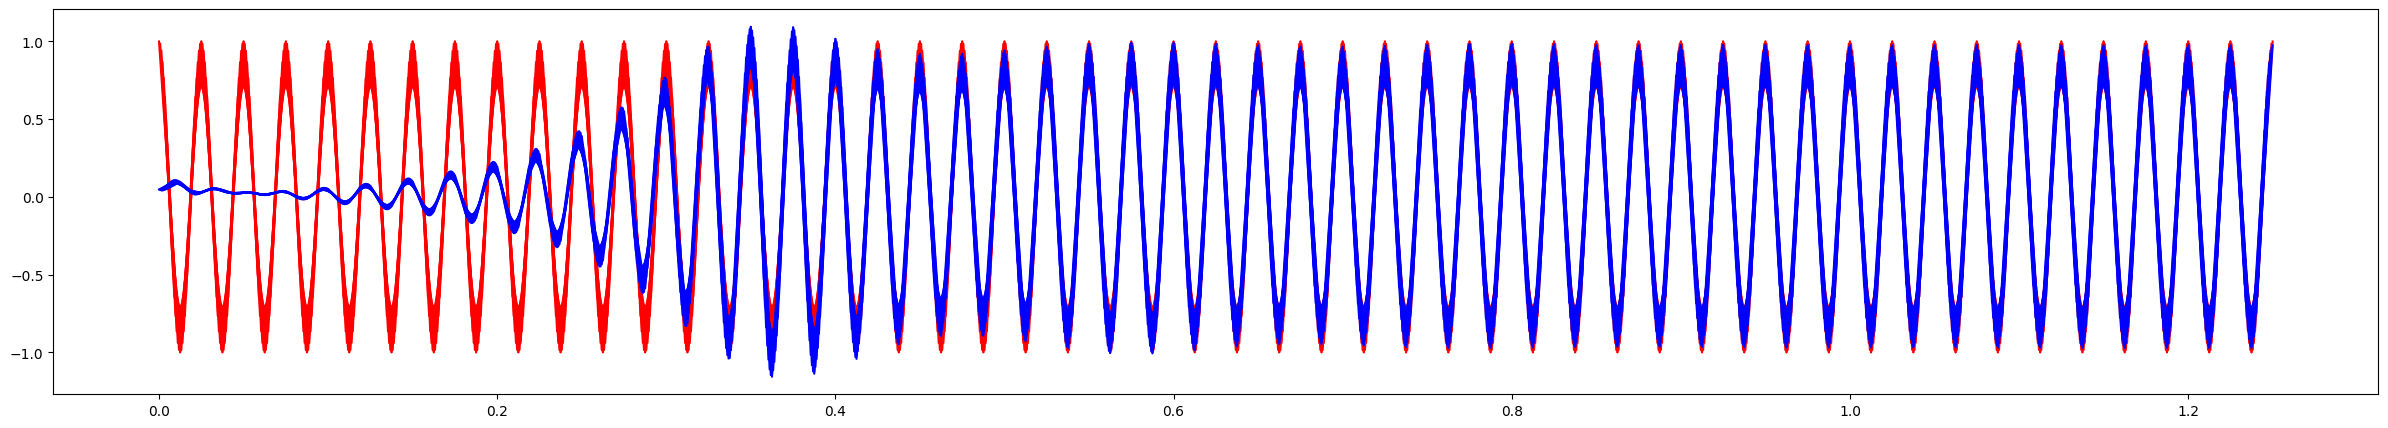

In [ ]:
import torch
from torch import nn

# Hyper Parameters

LR = 1e-3            # Learning rate


class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.GRU(
            input_size=1,       # Input size 
            hidden_size=32,     # Rnn hidden unit
            num_layers=3,       # Number of rnn layers
            batch_first=True,   # Input & output will have batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = self.out(r_out)
        return outs, h_state

rnn = RNN()

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)       # Optimize all cnn parameters
loss_func = nn.MSELoss()

h_state = None                                              # For initial hidden state
pred = np.zeros((200,10))


for step in range(200):
    x_np = sin[step].astype(np.float32)
    y_np = cos[step].astype(np.float32)
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # Rnn output
    pred[step] = prediction.data.numpy().flatten()
    h_state = h_state.data                  # Repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # Calculate loss
    optimizer.zero_grad()                   # Clear gradients for this training step
    loss.backward()                         # Backpropagation, compute gradients
    optimizer.step()                        # Apply gradients

plt.figure(1,figsize=(30,5))                # Define a figure for plots
plt.plot(t,cos,'r-')                        # Plot cosine with red color 
plt.plot(t,pred,'b-')                       # Plot prediction with blue color
plt.show()                       

# Βήμα 9

Στο σημείο αυτό εγκαθιστούμε τις εκδόσεις των πακέτων όπως προτάθηκε από [εδώ](https://github.com/slp-ntua/patrec-labs/issues/44).

In [ ]:
!pip install gensim==3.8.1 matplotlib==3.1.0 nltk==3.4.4 numpy==1.16.4 pandas==0.24.2 pomegranate==0.12.0 scikit-image==0.15.0 scikit-learn==0.21.2 scipy==1.3.0 seaborn==0.9.0 torch==1.3.1 torchvision==0.4.2 tqdm==4.32.1
!pip install numba==0.48.0 --ignore-installed
!pip install librosa==0.7.1
!pip install joblib==0.17.0

In [ ]:
! unzip recordings.zip

Για την διαδικασία διαβάσματος των νέων δεδομένων, εξαγωγής των MFCCs, κανονικοποίησης και χωρισμού σε train και test set χρησιμοποιούμε την έτοιμη υλοποίηση που δίνεται από [εδώ](https://github.com/slp-ntua/patrec-labs/blob/main/lab2/parser.py)

In [ ]:
import os
from glob import glob

import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


def parse_free_digits(directory):
    # Parse relevant dataset info
    files = glob(os.path.join(directory, "*.wav"))
    fnames = [f.split("/")[1].split(".")[0].split("_") for f in files]
    ids = [f[2] for f in fnames]
    y = [int(f[0]) for f in fnames]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        wav, _ = librosa.core.load(f, sr=None)

        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Print dataset info
    print("Total wavs: {}. Fs = {} Hz".format(len(wavs), Fs))

    return wavs, Fs, ids, y, speakers


def extract_features(wavs, n_mfcc=6, Fs=8000):
    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [
        librosa.feature.mfcc(
            wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=n_mfcc
        ).T

        for wav in tqdm(wavs, desc="Extracting mfcc features...")
    ]

    print("Feature extraction completed with {} mfccs per frame".format(n_mfcc))

    return frames


def split_free_digits(frames, ids, speakers, labels):
    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ["0", "1", "2", "3", "4"]

    for idx, frame, label, spk in zip(ids, frames, labels, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test


def make_scale_fn(X_train):
    # Standardize on train data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(X_train))
    def scale(X):
        scaled = []

        for frames in X:
            scaled.append(scaler.transform(frames))
        return scaled
    return scale


def parser(directory, n_mfcc=6):
    wavs, Fs, ids, y, speakers = parse_free_digits(directory)
    frames = extract_features(wavs, n_mfcc=n_mfcc, Fs=Fs)
    X_train, X_test, y_train, y_test, spk_train, spk_test = split_free_digits(
        frames, ids, speakers, y
    )

    return X_train, X_test, y_train, y_test, spk_train, spk_test

In [ ]:
dir = "recordings/"
X_train, X_test, y_train, y_test, spk_train, spk_test = parser(dir)

Extracting mfcc features...:   1%|          | 31/3000 [00:00<00:09, 302.16it/s]

Total wavs: 3000. Fs = 8000 Hz


Extracting mfcc features...: 100%|██████████| 3000/3000 [00:09<00:00, 302.65it/s]


Feature extraction completed with 6 mfccs per frame


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20, random_state=10) # Split train data to new training - validation set with stratified split (stratify = y_train)
scale_fn = make_scale_fn(X_train)                                                                                      # Use only X_train to calculate normalization statistics
X_train = scale_fn(X_train) 
X_val = scale_fn(X_val)
X_test = scale_fn(X_test)

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val), np.array(X_test), np.array(y_test) # Convert lists to numpy arrays

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
print("\033[1m X_train shape is: {}".format(X_train.shape))
print("\033[1m X_val shape is: {}".format(X_val.shape))
print("\033[1m X_test shape is: {}".format(X_test.shape))
print("\033[1m y_train shape is: {}".format(y_train.shape))
print("\033[1m y_val shape is: {}".format(y_val.shape))
print("\033[1m y_test shape is: {}".format(y_test.shape))

 X_train shape is: (2160,)
 X_val shape is: (540,)
 X_test shape is: (300,)
 y_train shape is: (2160,)
 y_val shape is: (540,)
 y_test shape is: (300,)


# Βήματα 10-12

In [ ]:
from pomegranate import *

def hmm(x_train, n_states, n_mixtures): 
    for i, features in enumerate(x_train): # Create numpy array X with data from a single digit 
      if i == 0:
        X = features
      else:
        X = np.concatenate((X,features))
    dists = []                            # list of probability distributions for the HMM states
    if n_mixtures == 1:                   # If n_mixtures equal to 1 
       gmm = False                        # Set gmm parameter equal to False
    else:                                 # else
      gmm = True                          # Set equal to True
    for i in range(n_states):
        if gmm:
            a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_mixtures, np.float_(X))
        else:
            a = MultivariateGaussianDistribution.from_samples(np.float_(X))
        dists.append(a)

    # Define transition matrix
    if n_states == 1: trans_mat = np.array([[1]])
    else: 
        trans_mat = np.array([0.5]*(n_states-1) + [1])
        trans_mat = np.diag(trans_mat)
        for i in range(trans_mat.shape[0]-1):
            trans_mat[i,i+1] = 0.5

    # Define starting probability matrix
    starts = np.zeros(n_states)
    starts[0] = 1
    
    # Define ending probability matrix
    ends = np.zeros(n_states)
    ends[n_states - 1] = 1

    # Define the GMM-HMM
    model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends, state_names=['s{}'.format(i) for i in range(n_states)])

    data = x_train.tolist() # your data: must be a Python list that contains: 2D lists with the sequences (so its dimension would be num_sequences x seq_length x feature_dimension)
    
    # Fit the model
    model.fit(data, max_iterations=1000)
    return model

In [ ]:
def calculate_accuracy(model,X_test,y_test):

    correct, predictions = 0, []                                                # Initializations
    for i in range(X_test.shape[0]):                                            # For each data in test/val set
        logp = np.zeros(10)                                                     # Initialize logp vector ((10,)) 
        for j in range(10): logp[j], _ = model[j].viterbi(X_test[i])            # For each model (total 10) run viterbi algorithm and return log-probability
        if np.argmax(logp)==y_test[i]: correct += 1                             # If y_pred = y_test increase correct by 1
        predictions.append(np.argmax(logp))                                     # Append prediction for current data to "predictions" list
    return correct/len(X_test), predictions                                     # Return accuracy and predictions 

In [ ]:
 validation_scores = {}                                                                 # Initialize empty dictionary with validation scores / accuracies
 for n_states in [1,2,3,4]:                                                             # Use n_states from 1 - 4
        for n_mixtures in [1,2,3,4,5]:                                                  # Use n_mixtures from 1 - 5
            hmm_models = []                                                             # For each combination of (n_states, n_mixtures) initialize "hmm_models" list 
            for digit in range(10):                                                     # For each digit
                hmm_models.append(hmm(X_train[y_train == digit], n_states, n_mixtures)) # Append fitted GMM-HMM model (total 10: one for each digit) to "hmm_models" list 
            accuracy,_ = calculate_accuracy(hmm_models,X_val,y_val)                     # Calculate accuracy on validation data
            validation_scores[(n_states,n_mixtures)] = accuracy                         # Save accuracy to "validation_scores" dictionary

UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Σύμφωνα με το post [αυτό](https://github.com/slp-ntua/patrec-labs/issues/43) τα παραπάνω errors / warnings που εμφανίζονται κατά την εκπαίδευση του μοντέλου μπορούν να αγνοηθούν καθώς οφείλονται στις μη συχνές ενημερώσεις του pomegranate και μπορούν να αγνοηθούν.

In [ ]:
for n_states in [1,2,3,4]:
        for n_mixtures in [1,2,3,4,5]:
            print("Validation Accuracy for \033[1mn_states = {}\033[0m and \033[1mn_mixtures = {}\033[0m is \033[1m{} %\033[0m: ".format(n_states,n_mixtures,np.round(validation_scores[(n_states,n_mixtures)]*100,2))) # For each combination of n_states and n_mixtures print the corresponding validation accuracy 

Validation Accuracy for n_states = 1 and n_mixtures = 1 is 80.0 %: 
Validation Accuracy for n_states = 1 and n_mixtures = 2 is 86.85 %: 
Validation Accuracy for n_states = 1 and n_mixtures = 3 is 90.19 %: 
Validation Accuracy for n_states = 1 and n_mixtures = 4 is 89.63 %: 
Validation Accuracy for n_states = 1 and n_mixtures = 5 is 96.48 %: 
Validation Accuracy for n_states = 2 and n_mixtures = 1 is 85.74 %: 
Validation Accuracy for n_states = 2 and n_mixtures = 2 is 91.3 %: 
Validation Accuracy for n_states = 2 and n_mixtures = 3 is 92.22 %: 
Validation Accuracy for n_states = 2 and n_mixtures = 4 is 95.56 %: 
Validation Accuracy for n_states = 2 and n_mixtures = 5 is 97.04 %: 
Validation Accuracy for n_states = 3 and n_mixtures = 1 is 90.93 %: 
Validation Accuracy for n_states = 3 and n_mixtures = 2 is 93.52 %: 
Validation Accuracy for n_states = 3 and n_mixtures = 3 is 96.48 %: 
Validation Accuracy for n_states = 3 and n_mixtures = 4 is 98.33 %: 
Validation Accuracy for n_states = 3

In [ ]:
n_states_opt, n_mixtures_opt = max(validation_scores, key=validation_scores.get)        # Find optimal values for n_states and n_mixtures
hmm_models_opt = []                                                                     # Initialize list with optimal models
for digit in range(10):                                                                 # For each digit 
    hmm_models_opt.append(hmm(X_train[y_train == digit], n_states_opt, n_mixtures_opt)) # Append fitted GMM-HMM model (total 10: one for each digit) to "hmm_models" list 

In [ ]:
val_accuracy, val_pred = calculate_accuracy(hmm_models_opt,X_val,y_val)         # Find accuracy and predictions of optimal models on validation set 
test_accuracy, test_pred = calculate_accuracy(hmm_models_opt,X_test,y_test)     # Find accuracy and predictions of optimal models on test set
print("Validation Accuracy for \033[1mn_states = {}\033[0m and \033[1mn_mixtures = {}\033[0m is \033[1m{} %\033[0m: ".format(n_states_opt,n_mixtures_opt,np.round(val_accuracy*100,2)))
print("Test Accuracy for \033[1mn_states = {}\033[0m and \033[1mn_mixtures = {}\033[0m is \033[1m{} %\033[0m: ".format(n_states_opt,n_mixtures_opt,np.round(test_accuracy*100,2)))

Validation Accuracy for n_states = 4 and n_mixtures = 5 is 98.7 %: 
Test Accuracy for n_states = 4 and n_mixtures = 5 is 98.67 %: 


# Βήμα 13

Για την απεικόνιση των Confusion Matrices τροποποιούμε την έτοιμη συνάρτηση που μας δίνεται από [εδώ](https://github.com/slp-ntua/patrec-labs/blob/main/lab2/plot_confusion_matrix.py) ώστε να εμφανίζει τους δύο πίνακες (ένας για το validation set και ένας για το test set) σε μορφή subplots.

In [ ]:
import itertools

def plot_confusion_matrix(val_cm, test_cm, classes, normalize=False, title1='Confusion matrix for Validation set', title2='Confusion matrix for Test set', cmap=plt.cm.Blues):
    if normalize:
        val_cm = val_cm.astype('float') / val_cm.sum(axis=1)[:, np.newaxis]
        test_cm = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis]

    fig,axs = plt.subplots(1,2,figsize=(20,8))

    img1 = axs[0].imshow(val_cm, interpolation='nearest', cmap=cmap)
    img2 = axs[1].imshow(test_cm, interpolation='nearest', cmap=cmap)
    
    axs[0].set_title(title1)
    axs[1].set_title(title2)

    fig.colorbar(img1, ax=axs[0])
    fig.colorbar(img2, ax=axs[1])

    tick_marks = np.arange(len(classes))

    axs[0].set_xticks(tick_marks)
    axs[1].set_xticks(tick_marks)
    axs[0].set_yticks(tick_marks)
    axs[1].set_yticks(tick_marks)

    fmt = '.2f' if normalize else 'd'
    var_thresh = val_cm.max() / 2.
    test_thresh = test_cm.max() / 2.

    for i, j in itertools.product(range(val_cm.shape[0]), range(val_cm.shape[1])):
        axs[0].text(j, i, format(val_cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if val_cm[i, j] > var_thresh else "black")
        
    for i, j in itertools.product(range(test_cm.shape[0]), range(test_cm.shape[1])):
        axs[1].text(j, i, format(test_cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if test_cm[i, j] > test_thresh else "black")
        
    axs[0].set_ylabel('True label')
    axs[1].set_ylabel('True label')
    axs[0].set_xlabel('Predicted label')
    axs[1].set_xlabel('Predicted label')

    fig.tight_layout()

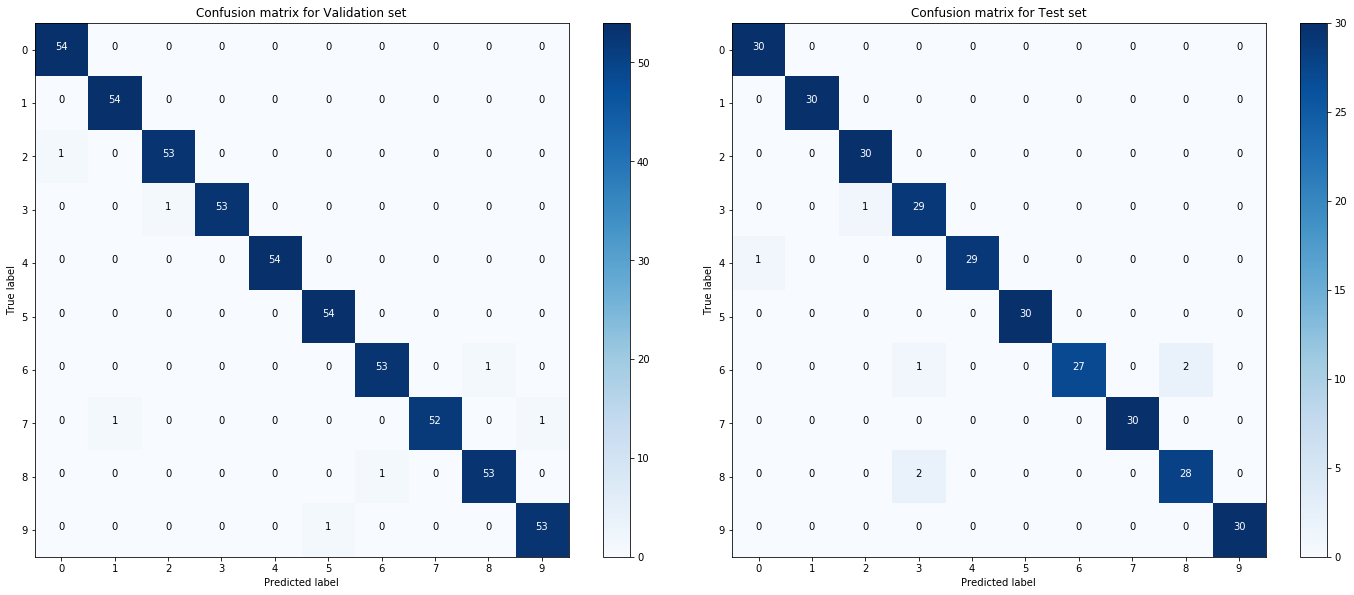

In [ ]:
from sklearn.metrics import confusion_matrix

val_cm = confusion_matrix(y_val, val_pred)       # Confusion matrix for validation set
test_cm = confusion_matrix(y_test, test_pred)    # Confusion matrix for test set

classes = [0,1,2,3,4,5,6,7,8,9] 

plot_confusion_matrix(val_cm, test_cm, classes) # Plot Confusion Matrices

# Βήμα 14

In [ ]:
from torch.utils.data import Dataset
import torch

class FrameLevelDataset(Dataset):
    
    def __init__(self, feats, labels):
        self.lengths = torch.from_numpy(np.array([wav.shape[0] for wav in feats])).type(torch.LongTensor)  # Find the lengths for each one of the wav files
        self.feats = self.zero_pad_and_stack(feats)   # Call zero_pad_and_stack to 
        
        if isinstance(labels, (list, tuple)):
            self.labels = torch.tensor(labels)

    def zero_pad_and_stack(self, x):
        num_sequences = len(x)
        max_sequence_length = max(self.lengths)
        feature_dimension = x[0].shape[1]
        padded = np.zeros((num_sequences,max_sequence_length,feature_dimension))
        
        for i, wav in enumerate(x):
            pad = max_sequence_length - wav.shape[0]
            if pad:
                padded_wav = np.pad(wav,[(0,pad),(0,0)], mode = 'constant')
            else:
                padded_wav = wav
            padded[i,:,:] = padded_wav
        return torch.from_numpy(padded).type(torch.FloatTensor)

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)

In [ ]:
train_dataset = FrameLevelDataset(X_train.tolist(),y_train.tolist())
validation_dataset = FrameLevelDataset(X_val.tolist(),y_val.tolist())
test_dataset = FrameLevelDataset(X_test.tolist(),y_test.tolist())

In [ ]:
import torch.nn as nn

class BasicLSTM(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, bidirectional=False, dropout = 0):

        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional                                       # Parameter that defines if our model is unidirectional or bidiretional (bidirectional if True)
        self.feature_size = hidden_dim*2 if self.bidirectional else hidden_dim   # Feature size

        self.hidden_dim = hidden_dim         # Hidden dimensions
        self.num_layers = num_layers         # Number of hidden layers
        
        self.lstm    = nn.LSTM(input_dim, hidden_dim, num_layers, dropout = dropout, bidirectional=self.bidirectional, batch_first=True)  # Define LSTM model
        self.linear  = nn.Linear(self.feature_size, output_dim) # Apply linear transformation before output

    def forward(self, x, lengths):

        h0 = torch.zeros(self.num_layers*(1+int(self.bidirectional)), x.size(0), self.hidden_dim).requires_grad_()           # Initialize hidden state with zeros
        c0 = torch.zeros(self.num_layers*(1+int(self.bidirectional)), x.size(0), self.hidden_dim).requires_grad_()           # Initialize cell state
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        last_outputs = self.last_timestep(out,lengths,self.bidirectional)
        last_outputs = self.linear(last_outputs)
        return last_outputs

    def last_timestep(self, outputs, lengths, bidirectional=False):

          if bidirectional:
              forward, backward = self.split_directions(outputs)
              last_forward = self.last_by_index(forward, lengths)
              last_backward = backward[:, 0, :]
              # Concatenate and return - maybe add more functionalities like average
              return torch.cat((last_forward, last_backward), dim=-1)

          else:
              return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):

        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):

        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()  

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True) 
validation_loader = DataLoader(validation_dataset, batch_size = len(X_val), shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = len(X_test), shuffle = False)

In [ ]:
def pack_pad(batch_size = 32):

    lengths_ = np.array([wav.shape[0] for wav in X_train])  # Calculate wav lengths
    indexes = lengths_.argsort()[::-1]                      # Sort lengths in descending order and keep indexes

    X_train_sorted = X_train[indexes]                       # Sort X_train according to descending length order
    y_train_sorted = y_train[indexes]                       # Sort y_train according to descending length order

    train_dataset_sorted = FrameLevelDataset(X_train_sorted.tolist(),y_train_sorted.tolist())             # Create sorted train dataset
    train_loader_sorted = DataLoader(train_dataset_sorted, batch_size = batch_size, shuffle=False)        # Create sorted train loader

    packed_batches = []                                     # Initialize packed_batches list 
    packed_labels = []                                      # Initialize packed_labels list 
    packed_lengths = []                                     # Initialize packed_lengths list 

    for i, (batch,labels,lengths) in enumerate(train_loader_sorted):     # For each bach in the data loader 
        max_batch_len = lengths[0]                                       # Find maximum length inside batch
        new_batch = torch.zeros(len(batch),max_batch_len,6)              # Initialize new batch that will contain cropped elements of the initial batch
        for j in range(len(batch)):                                      # For each file in the batch
            new_batch[j] = batch[j][:max_batch_len]                      # Keep only first max_batch_length rows and save them in new_batch
        packed_batches.append(new_batch)                                 # Add new_batch to packed_batches list
        packed_labels.append(labels)                                     # Add labels to packed_labels list
        packed_lengths.append(lengths)                                   # Add labels to packed_lengths list        
    
    return packed_batches, packed_labels, packed_lengths

In [ ]:
def fit(model, num_epochs, patience = 10, min_val_loss = np.Inf, early_stop = False, batch_size = 32, L2 = 0, earlyStopping = False, pack_padded_sequence = False):

    train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True) 
    validation_loader = DataLoader(validation_dataset, batch_size = len(X_val), shuffle = False) 

    # Cross Entropy Loss 
    loss_fn = nn.CrossEntropyLoss()

    # Adam Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=L2)

    train_losses, valid_losses = [], []

    for epoch in range(num_epochs):

        model.train()
        train_loss = 0
        correct = 0
        n_samples = 0
        if pack_padded_sequence:
           packed_batches, packed_labels, packed_lengths = pack_pad(batch_size)
           train_loader = list(zip(packed_batches, packed_labels, packed_lengths))
        for batch, labels, lengths in train_loader:      
            # Clear gradients
            optimizer.zero_grad()

            # Calculate output
            output = model(batch,lengths)

            # Calculate cross entropy loss
            loss = loss_fn(output, labels)
            
            predicted = torch.argmax(output, 1)
            correct += (predicted == labels).sum().item() 
            n_samples += len(labels)

            # Calculating gradients
            loss.backward()

            # Update parameters
            optimizer.step()
        
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_accuracy = correct / n_samples
        train_losses.append(train_loss)

        model.eval()
        valid_loss = 0
        correct = 0 
        n_samples = 0
        with torch.no_grad():
           for batch, labels, lengths in validation_loader:
                # Calculate output
                output = model(batch,lengths)
                # Calculate cross entropy loss
                loss = loss_fn(output, labels)
                predicted = torch.argmax(output, 1)
                correct += (predicted == labels).sum().item() 
                n_samples += len(labels)
                valid_loss += loss.item()
                # Check for use of earlyStopping
                if earlyStopping:
                    if valid_loss < min_val_loss: # improvement
                        torch.save(model,"best.pt")
                        epochs_no_improve = 0
                        min_val_loss = valid_loss
                    else: # no improvement
                        epochs_no_improve += 1
                    if epoch > 30 and epochs_no_improve == patience:
                        early_stop = True
                        break
                    else: continue
                else: continue
        valid_loss /= len(validation_loader)
        valid_accuracy = correct / n_samples 
        valid_losses.append(valid_loss)

        print("Epoch: {}/{}".format(epoch+1,num_epochs), "...", "\033[1mTraining loss: {:.6f}\033[0m".format(train_loss), "...", "Training Accuracy: {:.6f}".format(train_accuracy), "...", "\033[1mValidation loss: {:.6f}\033[0m".format(valid_loss), "...", "Validation Accuracy: {:.6f}".format(valid_accuracy))

        # Check early stopping condition
        if early_stop and earlyStopping:
           print('Early stopping!')
           print('Stopped')
           break

    return model, train_losses, valid_losses

## Απλό LSTM

In [ ]:
# Create LSTM
input_dim = 6     # input dimension
hidden_dim = 32   # hidden layer dimension
layer_dim = 2     # number of hidden layers
output_dim = 10   # output dimension

model = BasicLSTM(input_dim, hidden_dim, layer_dim, output_dim)

# Number of epochs
num_epochs = 200

In [ ]:
# Fit
trained_model, train_losses, valid_losses = fit(model, num_epochs)

Epoch: 1/200 ... Training loss: 2.201608 ... Training Accuracy: 0.212500 ... Validation loss: 1.912136 ... Validation Accuracy: 0.320370
Epoch: 2/200 ... Training loss: 1.590737 ... Training Accuracy: 0.431481 ... Validation loss: 1.295848 ... Validation Accuracy: 0.568519
Epoch: 3/200 ... Training loss: 1.128490 ... Training Accuracy: 0.662963 ... Validation loss: 1.002196 ... Validation Accuracy: 0.711111
Epoch: 4/200 ... Training loss: 0.843566 ... Training Accuracy: 0.767593 ... Validation loss: 0.743500 ... Validation Accuracy: 0.774074
Epoch: 5/200 ... Training loss: 0.703555 ... Training Accuracy: 0.793056 ... Validation loss: 0.595270 ... Validation Accuracy: 0.853704
Epoch: 6/200 ... Training loss: 0.571395 ... Training Accuracy: 0.844444 ... Validation loss: 0.529960 ... Validation Accuracy: 0.850000
Epoch: 7/200 ... Training loss: 0.470569 ... Training Accuracy: 0.868056 ... Validation loss: 0.496174 ... Validation Accuracy: 0.866667
Epoch: 8/200 ... Training loss: 0.402755 

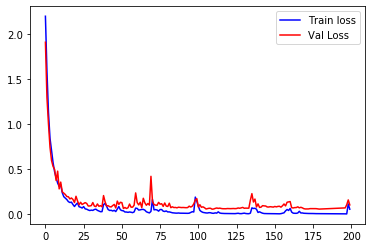

In [ ]:
epochs = [i for i in range(num_epochs)]
plt.plot(epochs, train_losses, 'b', label='Train loss')
plt.plot(epochs, valid_losses, 'r', label='Val Loss')
plt.legend()
plt.show()

## Προσθήκη dropout και L2 Regularization

In [ ]:
# Create LSTM
input_dim = 6     # input dimension
hidden_dim = 32   # hidden layer dimension
layer_dim = 2     # number of hidden layers
output_dim = 10   # output dimension

model = BasicLSTM(input_dim, hidden_dim, layer_dim, output_dim, dropout = 0.2)

# Number of epochs
num_epochs = 200

In [ ]:
# Fit
trained_model, train_losses, valid_losses = fit(model, num_epochs, L2 = 1e-4)

Epoch: 1/200 ... Training loss: 2.207468 ... Training Accuracy: 0.180093 ... Validation loss: 1.868808 ... Validation Accuracy: 0.331481
Epoch: 2/200 ... Training loss: 1.597298 ... Training Accuracy: 0.402778 ... Validation loss: 1.330004 ... Validation Accuracy: 0.583333
Epoch: 3/200 ... Training loss: 1.146047 ... Training Accuracy: 0.654630 ... Validation loss: 0.960762 ... Validation Accuracy: 0.705556
Epoch: 4/200 ... Training loss: 0.848122 ... Training Accuracy: 0.753704 ... Validation loss: 0.764114 ... Validation Accuracy: 0.783333
Epoch: 5/200 ... Training loss: 0.652633 ... Training Accuracy: 0.813426 ... Validation loss: 0.628633 ... Validation Accuracy: 0.822222
Epoch: 6/200 ... Training loss: 0.541593 ... Training Accuracy: 0.846296 ... Validation loss: 0.536962 ... Validation Accuracy: 0.862963
Epoch: 7/200 ... Training loss: 0.486629 ... Training Accuracy: 0.863426 ... Validation loss: 0.433721 ... Validation Accuracy: 0.887037
Epoch: 8/200 ... Training loss: 0.397010 

## Προσθήκη Early Stopping και Checkpoints

In [ ]:
# Create LSTM
input_dim = 6     # input dimension
hidden_dim = 32   # hidden layer dimension
layer_dim = 2     # number of hidden layers
output_dim = 10   # output dimension

model = BasicLSTM(input_dim, hidden_dim, layer_dim, output_dim, dropout = 0.2)

# Number of epochs
num_epochs = 200

In [ ]:
# Fit
trained_model, train_losses, valid_losses = fit(model, num_epochs, L2 = 1e-4, earlyStopping = True)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BasicLSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1/200 ... Training loss: 2.224406 ... Training Accuracy: 0.185185 ... Validation loss: 1.938306 ... Validation Accuracy: 0.331481
Epoch: 2/200 ... Training loss: 1.656021 ... Training Accuracy: 0.405556 ... Validation loss: 1.375104 ... Validation Accuracy: 0.520370
Epoch: 3/200 ... Training loss: 1.198880 ... Training Accuracy: 0.606944 ... Validation loss: 1.035837 ... Validation Accuracy: 0.640741
Epoch: 4/200 ... Training loss: 0.944315 ... Training Accuracy: 0.680556 ... Validation loss: 0.842567 ... Validation Accuracy: 0.711111
Epoch: 5/200 ... Training loss: 0.762667 ... Training Accuracy: 0.750000 ... Validation loss: 0.681843 ... Validation Accuracy: 0.783333
Epoch: 6/200 ... Training loss: 0.618371 ... Training Accuracy: 0.812500 ... Validation loss: 0.564431 ... Validation Accuracy: 0.827778
Epoch: 7/200 ... Training loss: 0.547282 ... Training Accuracy: 0.837963 ... Validation loss: 0.730262 ... Validation Accuracy: 0.768519
Epoch: 8/200 ... Training loss: 0.539287 

In [ ]:
def find_accuracy(model, data_loader):
    model.eval()
    correct = 0
    n_samples = 0
    predictions = []
    with torch.no_grad():
            for batch, labels, lengths in data_loader:
                output = model(batch, lengths)
                predicted = torch.argmax(output,1)
                predictions.append(predicted)
                correct += (predicted == labels).sum().item() 
                n_samples += len(labels)
    accuracy = correct / n_samples
    return accuracy, predictions

In [ ]:
# Accuracy and predictions on test set
test_accuracy, _ = find_accuracy(trained_model, test_loader)
# Accuracy and predictions on validation set
val_accuracy, _ = find_accuracy(trained_model, validation_loader)

print("Accuracy of the final model on \033[1mvalidation data\033[0m is \033[1m{}%\033[0m:".format(np.round(val_accuracy,3)*100))
print("Accuracy of the final model on \033[1mtest data\033[0m is \033[1m{}%\033[0m:".format(np.round(test_accuracy,3)*100))
print()

best_model = torch.load("best.pt")
# Accuracy and predictions on test set
test_accuracy, _ = find_accuracy(best_model, test_loader)
# Accuracy and predictions on validation set
val_accuracy, _ = find_accuracy(best_model, validation_loader)

print("Accuracy of the best model on \033[1mvalidation data\033[0m is \033[1m{}%\033[0m:".format(np.round(val_accuracy,3)*100))
print("Accuracy of the best model on \033[1mtest data\033[0m is \033[1m{}%\033[0m:".format(np.round(test_accuracy,3)*100))

Accuracy of the final model on validation data is 95.6%:
Accuracy of the final model on test data is 93.30000000000001%:

Accuracy of the best model on validation data is 98.7%:
Accuracy of the best model on test data is 97.0%:


## Bidirectional LSTM

In [ ]:
# Create LSTM
input_dim = 6     # input dimension
hidden_dim = 32   # hidden layer dimension
layer_dim = 2     # number of hidden layers
output_dim = 10   # output dimension

model = BasicLSTM(input_dim, hidden_dim, layer_dim, output_dim, bidirectional = True, dropout = 0.2)

# Number of epochs
num_epochs = 200

In [ ]:
# Fit
trained_model, train_losses, valid_losses = fit(model, num_epochs, L2 = 1e-4, earlyStopping = True)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BasicLSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1/200 ... Training loss: 1.999805 ... Training Accuracy: 0.430556 ... Validation loss: 1.318076 ... Validation Accuracy: 0.638889
Epoch: 2/200 ... Training loss: 0.924993 ... Training Accuracy: 0.757870 ... Validation loss: 0.631875 ... Validation Accuracy: 0.835185
Epoch: 3/200 ... Training loss: 0.483486 ... Training Accuracy: 0.881944 ... Validation loss: 0.372083 ... Validation Accuracy: 0.896296
Epoch: 4/200 ... Training loss: 0.317442 ... Training Accuracy: 0.912037 ... Validation loss: 0.273051 ... Validation Accuracy: 0.925926
Epoch: 5/200 ... Training loss: 0.247562 ... Training Accuracy: 0.936111 ... Validation loss: 0.242459 ... Validation Accuracy: 0.931481
Epoch: 6/200 ... Training loss: 0.187177 ... Training Accuracy: 0.951852 ... Validation loss: 0.188668 ... Validation Accuracy: 0.948148
Epoch: 7/200 ... Training loss: 0.154150 ... Training Accuracy: 0.961574 ... Validation loss: 0.240790 ... Validation Accuracy: 0.922222
Epoch: 8/200 ... Training loss: 0.145556 

## Αξιολόγηση βέλτιστου μοντέλου στα validation και test data

In [ ]:
best_model = torch.load("best.pt")
# Accuracy and predictions on test set
test_accuracy, predictions = find_accuracy(best_model, test_loader)
test_pred = predictions[0].numpy()
# Accuracy and predictions on validation set
val_accuracy, predictions = find_accuracy(best_model, validation_loader)
val_pred = predictions[0].numpy()

print("Accuracy of the best model on \033[1mvalidation data\033[0m is \033[1m{}%\033[0m:".format(np.round(val_accuracy,3)*100))
print("Accuracy of the best model on \033[1mtest data\033[0m is \033[1m{}%\033[0m:".format(np.round(test_accuracy,3)*100))

Accuracy of the best model on validation data is 99.3%:
Accuracy of the best model on test data is 99.3%:


## Διαγράμματα σφάλματος

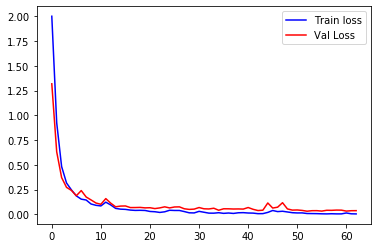

In [ ]:
epochs = [i for i in range(len(train_losses))]
plt.plot(epochs, train_losses, 'b', label='Train loss')
plt.plot(epochs, valid_losses, 'r', label='Val Loss')
plt.legend()
plt.show()

## Confusion Matrices

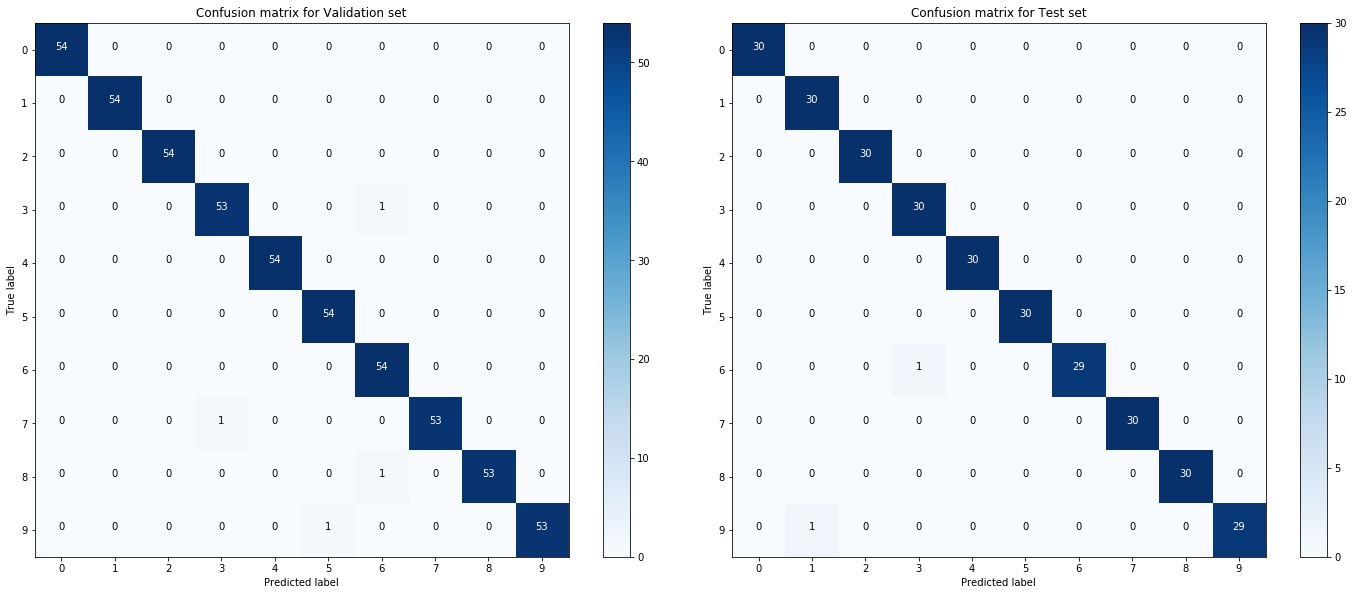

In [ ]:
test_cm = confusion_matrix(y_test, test_pred)
val_cm = confusion_matrix(y_val, val_pred)

classes = [0,1,2,3,4,5,6,7,8,9]

plot_confusion_matrix(val_cm,test_cm,classes)

## Bonus

In [ ]:
import time

In [ ]:
# Create LSTM
input_dim = 6     # input dimension
hidden_dim = 32   # hidden layer dimension
layer_dim = 2     # number of hidden layers
output_dim = 10   # output dimension

model = BasicLSTM(input_dim, hidden_dim, layer_dim, output_dim, bidirectional = True, dropout = 0.2)

# Number of epochs
num_epochs = 50

In [ ]:
# Fit
start_time = time.time()
trained_model, train_losses, valid_losses = fit(model, num_epochs, L2 = 1e-4)
without_pack_pad_time = time.time() - start_time

Epoch: 1/50 ... Training loss: 2.050514 ... Training Accuracy: 0.338889 ... Validation loss: 1.402021 ... Validation Accuracy: 0.625926
Epoch: 2/50 ... Training loss: 0.983393 ... Training Accuracy: 0.720833 ... Validation loss: 0.657259 ... Validation Accuracy: 0.822222
Epoch: 3/50 ... Training loss: 0.520693 ... Training Accuracy: 0.861574 ... Validation loss: 0.413339 ... Validation Accuracy: 0.885185
Epoch: 4/50 ... Training loss: 0.351738 ... Training Accuracy: 0.902315 ... Validation loss: 0.292115 ... Validation Accuracy: 0.922222
Epoch: 5/50 ... Training loss: 0.269459 ... Training Accuracy: 0.923611 ... Validation loss: 0.220236 ... Validation Accuracy: 0.953704
Epoch: 6/50 ... Training loss: 0.217147 ... Training Accuracy: 0.940741 ... Validation loss: 0.199327 ... Validation Accuracy: 0.948148
Epoch: 7/50 ... Training loss: 0.162691 ... Training Accuracy: 0.960648 ... Validation loss: 0.155953 ... Validation Accuracy: 0.964815
Epoch: 8/50 ... Training loss: 0.129014 ... Trai

In [ ]:
# Create LSTM
input_dim = 6     # input dimension
hidden_dim = 32   # hidden layer dimension
layer_dim = 2     # number of hidden layers
output_dim = 10   # output dimension

model = BasicLSTM(input_dim, hidden_dim, layer_dim, output_dim, bidirectional = True, dropout = 0.2)

# Number of epochs
num_epochs = 50

In [ ]:
# Fit
start_time = time.time()
trained_model, train_losses, valid_losses = fit(model, num_epochs, L2 = 1e-4, pack_padded_sequence=True)
with_pack_pad_time = time.time() - start_time

Epoch: 1/50 ... Training loss: 2.178484 ... Training Accuracy: 0.249537 ... Validation loss: 1.724195 ... Validation Accuracy: 0.590741
Epoch: 2/50 ... Training loss: 1.287724 ... Training Accuracy: 0.641204 ... Validation loss: 1.022979 ... Validation Accuracy: 0.661111
Epoch: 3/50 ... Training loss: 0.873082 ... Training Accuracy: 0.733796 ... Validation loss: 0.767203 ... Validation Accuracy: 0.744444
Epoch: 4/50 ... Training loss: 0.624661 ... Training Accuracy: 0.804630 ... Validation loss: 0.529295 ... Validation Accuracy: 0.840741
Epoch: 5/50 ... Training loss: 0.461518 ... Training Accuracy: 0.861111 ... Validation loss: 0.420404 ... Validation Accuracy: 0.879630
Epoch: 6/50 ... Training loss: 0.358369 ... Training Accuracy: 0.891204 ... Validation loss: 0.299319 ... Validation Accuracy: 0.920370
Epoch: 7/50 ... Training loss: 0.280543 ... Training Accuracy: 0.922222 ... Validation loss: 0.229368 ... Validation Accuracy: 0.940741
Epoch: 8/50 ... Training loss: 0.205663 ... Trai

In [ ]:
print('Fit time \033[1m without \033[0m pack_padded_sequence is \033[1m{} secs\033[0m'.format(without_pack_pad_time))

Fit time  without  pack_padded_sequence is 757.4098155498505 secs


In [ ]:
print('Fit time \033[1m with \033[0m pack_padded_sequence is \033[1m{} secs\033[0m'.format(with_pack_pad_time))

Fit time  with  pack_padded_sequence is 185.4024043083191 secs
